In [2]:
from data import *
data = load_mira_sample(reliable=True)
from wsdb_query import *
data_g = cm_gaia(data, cm_radius=0.2)

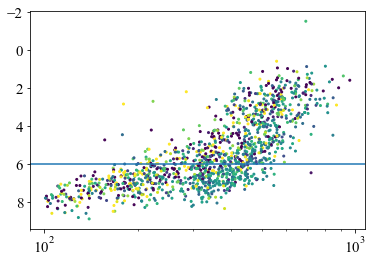

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['period'], data['Ks_mean_data']+1.6*(data['4_5']-data['Ks_mean_data']),c=data['pmb'],vmin=-10,vmax=10,s=4)
plt.semilogx()
plt.gca().invert_yaxis()
plt.axhline(6.)

(array([3., 0., 0., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.00962503, 0.01305956, 0.01649409, 0.01992862, 0.02336315,
        0.02679768, 0.03023221, 0.03366674, 0.03710127, 0.0405358 ,
        0.04397033, 0.04740486, 0.05083939, 0.05427392, 0.05770845,
        0.06114298, 0.06457751, 0.06801204, 0.07144657, 0.0748811 ,
        0.07831563, 0.08175016, 0.08518469, 0.08861922, 0.09205375,
        0.09548828, 0.09892281, 0.10235734, 0.10579187, 0.1092264 ,
        0.11266093, 0.11609546, 0.11952999, 0.12296452, 0.12639905,
        0.12983358, 0.13326811, 0.13670264, 0.14013717, 0.1435717 ,
        0.14700623, 0.15044076, 0.15387529, 0.15730982, 0.16074435,
        0.16417888, 0.16761341, 0.17104794, 0.17448247, 0.177917  ,
        0.18135153]),
 <BarContainer object of 50 artists>)

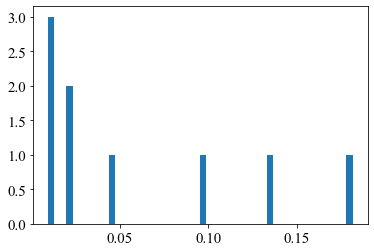

In [6]:
plt.hist(data_g['q3c_dist'],bins=50)

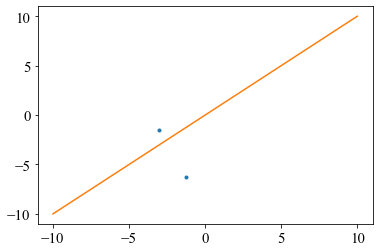

In [7]:
import matplotlib.pyplot as plt
plt.plot(data_g['pmra'], data['pmra'], '.')
xx = np.linspace(-10,10,100)
plt.plot(xx, xx)

In [8]:
from pm_transform import ml_mb
data_full_g = ml_mb(data_full_g)

NameError: name 'data_full_g' is not defined

In [ ]:
TMass=cm_catalogue(data_full_g, 'twomass.psc')

In [ ]:
fltr = (data_full_g['amplitude']>0.45)&(1./data_full_g['frequency']>350.)
plt.plot(data_full_g['l'][fltr]-360.*(data_full_g['l'][fltr]>180.), data_full_g['b'][fltr], '.')

fltr = (data['unreliable']==0)&(data['amplitude']>0.4)
# fltr &= (data['Ks_mean_data']+1.6*(data['4_5']-data['Ks_mean_data'])<6.)
plt.plot(data['l'][fltr]-360.*(data['l'][fltr]>180.), data['b'][fltr], '.', ms=5)

plt.gca().set_aspect('equal')
plt.gca().invert_xaxis()

In [ ]:
xx = np.linspace(9,13)
plt.plot(data['H_2MASS'],data['H_mean_data'],'.')
plt.plot(xx,xx)

In [ ]:
fltr = (data_full_g['amplitude']>0.45)&(data_full_g['frequency']>1e-3)&(data_full_g['frequency']<1e-2)
plt.hist((1./data_full_g['frequency'])[fltr],bins=100);
fltr = (data['unreliable']==0)&(data['amplitude']>0.4)&(np.abs(data['b'])<0.4)
plt.hist((data['period'])[fltr],bins=100,histtype='step');

In [ ]:
fltr = (data_full_g['amplitude']>0.45)&(data_full_g['frequency']>1e-3)&(data_full_g['frequency']<1e-2)&(1./data_full_g['frequency']>300.)
plt.plot(data_full_g['pmb'][fltr], data_full_g['b'][fltr],'.')

In [ ]:
f,a=plt.subplots(1,2,figsize=(10,5))
per_bin = [500.,600.]
plt.sca(a[0])
fltr = (data_full_g['amplitude']>0.45)&(data_full_g['frequency']>1e-3)&(data_full_g['frequency']<1e-2)
# fltr &= (1./data_full_g['frequency']>per_bin[0])&(1./data_full_g['frequency']<per_bin[1])
plt.hist(data_full_g['pml'][fltr],bins=30,range=[-15,5],density=True,histtype='step');
fltr = (data['unreliable']==0)&(data['amplitude']>0.4)&(np.abs(data['b'])<.4)&(data['period']>per_bin[0])&(data['period']<per_bin[1])
fltr &= (data['Ks_mean_data']+1.6*(data['4_5']-data['Ks_mean_data'])>4.)
plt.hist(data['pml'][fltr]/4.74,bins=30,range=[-15,5],density=True,histtype='step');
plt.axvline(-6.379,color='k')
# plt.axvline(-6.37-100./4.74/8.275)
# plt.axvline(-6.37+100./4.74/8.275)
plt.sca(a[1])
fltr = (data_full_g['amplitude']>0.45)&(data_full_g['frequency']>1e-3)&(data_full_g['frequency']<1e-2)
# fltr &= (1./data_full_g['frequency']>per_bin[0])&(1./data_full_g['frequency']<per_bin[1])
plt.hist(data_full_g['pmb'][fltr],bins=30,range=[-10,10],density=True,histtype='step',label='Gaia');
fltr = (data['unreliable']==0)&(data['amplitude']>0.4)&(np.abs(data['b'])<.4)&(data['period']>per_bin[0])&(data['period']<per_bin[1])
fltr &= (data['Ks_mean_data']+1.6*(data['4_5']-data['Ks_mean_data'])>4.)
plt.hist(data['pmb'][fltr]/4.74,bins=30,range=[-10,10],density=True,histtype='step',label='VVV');
plt.legend()
plt.axvline(-7.25/4.74/8.275,color='k')
# # plot gaussian width 20 km/s
# xx= np.linspace(-10,10,100)
# wwidth=40.
# plt.plot(xx, np.exp(-xx**2/2./(wwidth/4.74/8.275)**2)/np.sqrt(2.*np.pi)/(wwidth/4.74/8.275))



In [ ]:
fltr &= (data['epml']/4.74<1.)
plt.plot(data['pml'][fltr]/4.74,data['pmb'][fltr]/4.74,'.');

In [ ]:
fltr = (data_full_g['amplitude']>0.45)
plt.scatter((1./data_full_g['frequency'])[fltr], 
         (TMass['k_m']-1.3*(TMass['h_m']-TMass['k_m']))[fltr], 
         c=data_full_g['pmb'][fltr], s=4, cmap='viridis', vmin=-5, vmax=5)
plt.gca().invert_yaxis()
plt.colorbar()
plt.semilogx()
plt.ylim(9.,2.)
plt.xlim(100.,1000.)

In [ ]:
fltr = (data['unreliable']==0)&(data['amplitude']>0.4)
plt.scatter((data['period'])[fltr], 
         (data['Ks_2MASS']-1.3*(data['H_2MASS']-data['Ks_2MASS']))[fltr], 
         c=data['pmb'][fltr]/4.74, s=4, cmap='viridis', vmin=-5, vmax=5)
plt.colorbar()
plt.gca().invert_yaxis()
plt.semilogx()
plt.xlim(100.,1000.)

In [ ]:
fltr = (data_full_g['amplitude']>0.45)
plt.plot((1./data_full_g['frequency'])[fltr], 
         (TMass['k_m']-1.3*(TMass['h_m']-TMass['k_m']))[fltr], '.', ms=2)

fltr = (data_full_g['amplitude']>0.45)&(np.abs(data_full_g['b'])<.4)
plt.plot((1./data_full_g['frequency'])[fltr], 
         (TMass['k_m']-1.3*(TMass['h_m']-TMass['k_m']))[fltr], 'o', ms=6)


fltr = (data['unreliable']==0)&(data['amplitude']>0.4)
plt.plot((data['period'])[fltr], 
         (data['Ks_2MASS']-1.3*(data['H_2MASS']-data['Ks_2MASS']))[fltr], '.', ms=2)


# fltr = (data['unreliable']==0)&(data['amplitude']>0.4)&(np.abs(data['b'])>.4)
# plt.plot((data['period'])[fltr], 
#          (data['Ks_2MASS']-1.3*(data['H_2MASS']-data['Ks_2MASS']))[fltr], 'o', ms=4)

plt.gca().invert_yaxis()
plt.semilogx()
plt.xlim(100.,1000.)

In [ ]:
plt.hist(data_full_g['amplitude'],bins=150,range=[0,2]);

In [ ]:
plt.hist(data_full_g['pml'][data_full_g['amplitude']>0.45],bins=100,range=[-15,10]);

In [10]:
from wsdb_query import *
data_full_g = pd.DataFrame(sqlutil.get("""
select g.*, l.* from gaia_dr3.vari_long_period_variable as l 
left join gaia_dr3.gaia_source as g on l.source_id=g.source_id 
where abs(b)<1.5 and (l<1.5 or l>358.5);
""", **wsdb_kwargs))

/home/jls/miniconda3/envs/chemevo/lib/python3.10/site-packages/sqlutilpy/sqlutil.py:442: UserWarning: Column name solution_id is repeated in the output, new name solution_id_1 assigned
  warnings.warn(('Column name %s is repeated in the output, ' +
/home/jls/miniconda3/envs/chemevo/lib/python3.10/site-packages/sqlutilpy/sqlutil.py:442: UserWarning: Column name source_id is repeated in the output, new name source_id_1 assigned
  warnings.warn(('Column name %s is repeated in the output, ' +


In [58]:
NNH=np.histogram(1-age_period(1./data_full_g['frequency'][mira_fltr])/12.,bins=20,range=[0,1],
         weights=age_period(1./data_full_g['frequency'][mira_fltr])**0.5)
np.save('gaia_cumulative.npy', np.vstack([np.cumsum(NNH[0])/np.sum(NNH[0]),.5*(NNH[1][:-1]+NNH[1][1:])]))

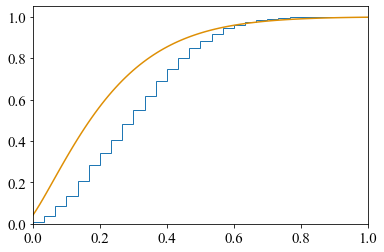

In [62]:
from plotting import age_period
import seaborn as sns
mira_fltr = (data_full_g['amplitude']>0.45)&(data_full_g['frequency']<1e-2)&(data_full_g['frequency']>1e-3)&(np.abs(data_full_g['b'])>1.)
plt.hist(1-age_period(1./data_full_g['frequency'][mira_fltr])/12.,bins=30,range=[0,1],
         weights=age_period(1./data_full_g['frequency'][mira_fltr])**0.5,histtype='step',density=True,cumulative=True);
plt.xlim(0.,1.)
xx = np.linspace(0.01,13.99,100)
BERNARD_MAX_AGE = 13.7
plt.plot(1-xx/BERNARD_MAX_AGE,1-np.exp(-((14-(xx-0.01))/14.*4.)**1.3),color=sns.color_palette('colorblind')[1],label='Bernard+ 2018 bulge')

In [314]:
from astropy.table import Table
mat = Table.read('matsunaga2009.vot')

In [412]:
# set seaborn palette colorblind
import seaborn as sns
sns.set_palette("colorblind")

In [ ]:
import sqlutilpy
def cm_glimpse(data, radeccols=['ra', 'dec'], cols=None, cmradius=1., include_single_epoch=False):
    ra = data[radeccols[0]].values
    dec = data[radeccols[1]].values
    select_cols = "*"
    if cols is not None:
        select_cols=",".join(["tt."+c for c in cols])
    gc3 = pd.DataFrame(
        sqlutilpy.local_join(
            """
                select %s, q3c_dist(m.ra_,m.dec_,tt.ra,tt.dec) as dist from mytable as m
                left join lateral (select * from glimpse.catalog3 as s
                where q3c_join(m.ra_, m.dec_,s.ra,s.dec,%0.5f/3600)  
                order by q3c_dist(m.ra_,m.dec_,s.ra,s.dec) asc limit 1)
                as tt on  true  order by xid """%(select_cols,cmradius),
            'mytable', (ra, dec, np.arange(len(dec))), ('ra_', 'dec_', 'xid'),**wsdb_kwargs))

    gc2 = pd.DataFrame(
        sqlutilpy.local_join(
            """
                select %s, q3c_dist(m.ra_,m.dec_,tt.ra,tt.dec) as dist from mytable as m
                left join lateral (select * from glimpse.catalog2 as s
                where q3c_join(m.ra_, m.dec_,s.ra,s.dec,%0.5f/3600)  
                order by q3c_dist(m.ra_,m.dec_,s.ra,s.dec) asc limit 1)
                as tt on  true  order by xid """%(select_cols,cmradius),
            'mytable', (ra, dec, np.arange(len(dec))), ('ra_', 'dec_', 'xid'),**wsdb_kwargs))
    fltr = (gc3['mag3_6'] != gc3['mag3_6'])
    gc3[fltr] = gc2[fltr]

    if include_single_epoch:

        gc4 = pd.DataFrame(
            sqlutilpy.local_join(
                """
            select %s, q3c_dist(m.ra_,m.dec_,tt.ra,tt.dec) as dist from mytable as m
            left join lateral (select * from jason_sanders.glimpse2_epoch1_catalog as s
            where q3c_join(m.ra_, m.dec_,s.ra,s.dec,%0.5f/3600)  
            order by q3c_dist(m.ra_,m.dec_,s.ra,s.dec) asc limit 1)
            as tt on  true  order by xid """%(select_cols,cmradius),
                'mytable', (ra, dec, np.arange(len(dec))), ('ra_', 'dec_', 'xid'),**wsdb_kwargs))

        for fl in ['3_6','4_5','5_8','8_0']:
            ## Do it band-by-band in case some bands available and others aren't
            fltr = (gc3['mag'+fl] != gc3['mag'+fl])&(gc4['mag'+fl] == gc4['mag'+fl])
            for c in ['mag%s','d%sm','f%s','df%s','rms_f%s','sky_%s','sn_%s','dens_%s','m%s','n%s','sqf_%s']:
                gc3.loc[fltr,c%fl] = gc4[c%fl].values[fltr]

    return gc3

def cm_ramirez(data, radeccols=['ra', 'de'], radius=1.):
    ra = data[radeccols[0]].values
    dec = data[radeccols[1]].values
    gnm = pd.DataFrame(
        sqlutil.local_join(
            """
                select *, q3c_dist(m.ra_,m.dec_,tt.ra,tt.dec) as dist from mytable as m
                left join lateral (select * from jason_sanders.spitzer_irac_gc as s
                where q3c_join(m.ra_, m.dec_,s.ra,s.dec,%0.3f/3600)  
                order by q3c_dist(m.ra_,m.dec_,s.ra,s.dec) asc limit 1)
                as tt on  true  order by xid """ % radius,
            'mytable', (ra, dec, np.arange(len(dec))), ('ra_', 'dec_', 'xid'),
            **wsdb_kwargs
        ))
    return gnm


def add_spitzer_phot(tbl,radeccols=['ra', 'dec']):
    glimpse = cm_glimpse(tbl, radeccols=radeccols, include_single_epoch=True)
    for c in ['mag3_6', 'mag4_5', 'mag5_8', 'mag8_0']:
        if c[3:]+'_glimpse' in tbl.columns:
            del tbl[c[3:]+'_glimpse']
        tbl[c] = glimpse[c]
        tbl.loc[(tbl[c]>90.)|(tbl[c]==0.),c]=np.nan
        tbl = tbl.rename(columns={c:c[3:]+'_glimpse'})
    for c in ['d3_6m', 'd4_5m', 'd5_8m', 'd8_0m']:
        if 'e'+c[1:-1]+'_glimpse' in tbl.columns:
            del tbl['e'+c[1:-1]+'_glimpse']
        tbl[c] = glimpse[c]
        tbl.loc[(tbl[c]>90.)|(tbl[c]==0.),c]=np.nan
        tbl = tbl.rename(columns={c:'e'+c[1:-1]+'_glimpse'})

    ramirez = cm_ramirez(tbl, radeccols=radeccols)
    for c in ['_3_6mag', '_4_5mag', '_5_8mag', '_8_0mag']:
        tbl[c[1:-3]+'_ramirez'] = ramirez[c]
        tbl['e'+c[1:-3]+'_ramirez'] = ramirez['e'+c]
        tbl.loc[tbl[c[1:-3]+'_ramirez']==0.,'e'+c[1:-3]+'_ramirez']=np.nan
        tbl.loc[tbl[c[1:-3]+'_ramirez']==0.,c[1:-3]+'_ramirez']=np.nan

    for c in ['3_6', '4_5', '5_8', '8_0']:
        tbl[c]=tbl[c+'_ramirez']
        tbl['e'+c]=tbl['e'+c+'_ramirez']
        tbl.loc[tbl[c]!=tbl[c],'e'+c]=tbl['e'+c+'_glimpse'][tbl[c]!=tbl[c]]
        tbl.loc[tbl[c]!=tbl[c],c]=tbl[c+'_glimpse'][tbl[c]!=tbl[c]]

    return tbl

In [ ]:
data_GG=add_spitzer_phot(data)
mat_GG=add_spitzer_phot(mat.to_pandas(), radeccols=['_RA','_DE'])
gaia_GG = add_spitzer_phot(data_full_g, radeccols=['ra','dec'])

/tmp/ipykernel_3611/2953196156.py:117: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(mat['Per'].value), mat['Ksmag'].value-1.66*(mat['Ksmag'].value-mat_GG['4_5'].values),'o',mec='k',mew=0.5,ms=5,zorder=30,


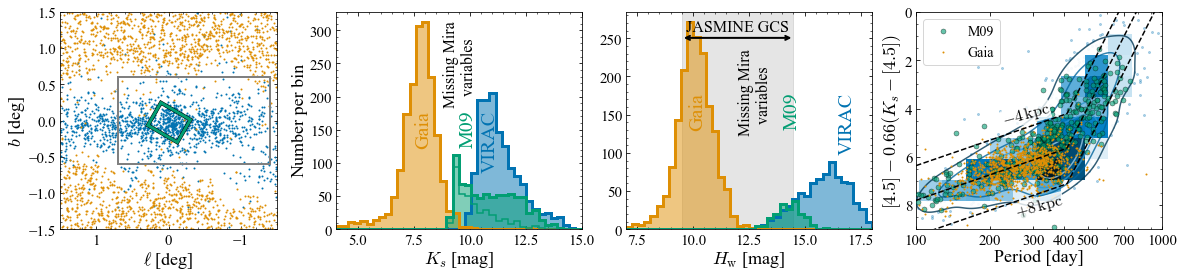

In [634]:
import seaborn as sns
f,a=plt.subplots(1,4,figsize=(20,4))
plt.subplots_adjust(wspace=0.18)

plt.sca(a[0])
fltr = (data['unreliable']==0)&(data['amplitude']>0.4)
# fltr &= (data['Ks_mean_data']+1.6*(data['4_5']-data['Ks_mean_data'])<6.)
plt.plot(data['l'][fltr]-360.*(data['l'][fltr]>180.), data['b'][fltr], '.', ms=2)

gaia_fltr = (data_full_g['amplitude']>0.45)&(data_full_g['frequency']<1e-2)&(data_full_g['frequency']>1e-3)
plt.plot(data_full_g['l'][gaia_fltr]-360.*(data_full_g['l'][gaia_fltr]>180.), data_full_g['b'][gaia_fltr], '.', ms=2)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.gca().set_aspect('equal')
plt.gca().invert_xaxis()
plt.xlabel(r'$\ell$ [deg]')
plt.ylabel(r'$b$ [deg]')
add_inner_ticks()

from matplotlib.patches import Rectangle
rr = Rectangle(width=0.47,height=0.36,xy=(-0.12,-0.3),angle=30.,facecolor='none',edgecolor='k',lw=4,alpha=1,zorder=10)
plt.gca().add_patch(rr)
rr = Rectangle(width=0.47,height=0.36,xy=(-0.12,-0.3),angle=30.,facecolor='none',edgecolor=sns.color_palette()[2],lw=3,alpha=1,zorder=10)
plt.gca().add_patch(rr)

plt.sca(a[1])
plt.hist(data['Ks_mean_data'],bins=40,range=[4,15],histtype='step',lw=3,density=False);
# filled version
plt.hist(data['Ks_mean_data'],bins=40,range=[4,15],histtype='stepfilled',alpha=0.5,color=sns.color_palette()[0],
         density=False);
plt.hist(TMass['k_m'][gaia_fltr],bins=40,range=[4,15],histtype='step',lw=3,density=False);
plt.hist(TMass['k_m'][gaia_fltr],bins=40,range=[4,15],histtype='stepfilled',
         alpha=0.5,color=sns.color_palette()[1],density=False);
from plotting_general import *

plt.hist(mat['Ksmag'][(mat['Kamp']>0.4)],bins=40,range=[4,15],histtype='step',lw=3,density=False);
plt.hist(mat['Ksmag'][mat['Kamp']>0.4],bins=40,range=[4,15],histtype='stepfilled',density=False,alpha=0.5,color=sns.color_palette()[2]);
plt.hist(mat['Ksmag'][(mat['Kamp']>0.4)&(mat['Per']>0.)],bins=40,range=[4,15],histtype='step',lw=1.5,density=False,color=sns.color_palette()[2]);

add_inner_ticks()
plt.xlim(4,15)

plt.annotate('Gaia', rotation=90, xy=(7.5, 180), xycoords='data', fontsize=20,
             color=sns.color_palette()[1],va='top')

plt.annotate('VIRAC', rotation=90, xy=(10.5, 180), xycoords='data', fontsize=20,
             color=sns.color_palette()[0],va='top')

plt.annotate('M09', rotation=90, xy=(9.5, 180), xycoords='data', fontsize=20,
             color=sns.color_palette()[2],va='top')

plt.annotate('Missing Mira\n   variables', rotation=90, xy=(8.8, 250), xycoords='data', fontsize=16, va='center');

plt.xlabel(r'$K_s$ [mag]')
plt.ylabel('Number per bin')

plt.sca(a[0])
plt.plot([-1.4,-1.4],[-0.6,0.6],color='gray',lw=2)
plt.plot([0.7,0.7],[-0.6,0.6],color='gray',lw=2)
plt.plot([-1.4,0.7],[-0.6,-0.6],color='gray',lw=2)
plt.plot([-1.4,0.7],[0.6,0.6],color='gray',lw=2)

plt.sca(a[2])


# plot arrow between 9.5 and 14.5
plt.annotate('', xy=(9.5, 250.5), xycoords='data', xytext=(14.5, 250.5), textcoords='data',
            arrowprops=dict(arrowstyle='<->', color='k', lw=2))
plt.annotate('JASMINE GCS', xy=(12, 265), xycoords='data', fontsize=16, color='k', va='center', ha='center')
plt.axvspan(9.5, 14.5, color='k', alpha=0.1,zorder=-10)

plt.hist((data['J_mean_data']*0.9+data['H_mean_data']*0.1-0.06*(data['J_mean_data']-data['H_mean_data'])**2)[fltr],bins=40,range=[7,18],histtype='step',lw=3,density=False);
plt.hist((data['J_mean_data']*0.9+data['H_mean_data']*0.1-0.06*(data['J_mean_data']-data['H_mean_data'])**2)[fltr],bins=40,range=[7,18],histtype='stepfilled',alpha=0.5,color=sns.color_palette()[0],
            density=False);


plt.hist((TMass['j_m']*0.9+TMass['h_m']*0.1-0.06*(TMass['j_m']-TMass['h_m'])**2)[gaia_fltr],bins=40,range=[7,18],histtype='step',lw=3,density=False);
plt.hist((TMass['j_m']*0.9+TMass['h_m']*0.1-0.06*(TMass['j_m']-TMass['h_m'])**2)[gaia_fltr],bins=40,range=[7,18],histtype='stepfilled',
            alpha=0.5,color=sns.color_palette()[1],density=False);


plt.hist((mat['Jmag']*0.9+mat['Hmag']*0.1-0.06*(mat['Jmag']-mat['Hmag'])**2)
         [(mat['Kamp']>0.4)],bins=40,range=[7,18],histtype='step',lw=3,density=False);
plt.hist((mat['Jmag']*0.9+mat['Hmag']*0.1-0.06*(mat['Jmag']-mat['Hmag'])**2)
            [(mat['Kamp']>0.4)],bins=40,range=[7,18],histtype='stepfilled',density=False,alpha=0.5,color=sns.color_palette()[2]);


add_inner_ticks()
plt.xlim(7,18)

plt.annotate('Gaia', rotation=90, xy=(9.8, 180), xycoords='data', fontsize=20,
             color=sns.color_palette()[1],va='top')

plt.annotate('VIRAC', rotation=90, xy=(16.5, 180), xycoords='data', fontsize=20,
             color=sns.color_palette()[0],va='top')

plt.annotate('M09', rotation=90, xy=(14.0, 180), xycoords='data', fontsize=20,
             color=sns.color_palette()[2],va='top')

plt.annotate('Missing Mira\n   variables', rotation=90, xy=(12.0, 180), xycoords='data', fontsize=16, va='center');


plt.xlabel(r'$H_\mathrm{w}$ [mag]')


plt.sca(a[3])

import kalepy
fltr = (data_GG['4_5'].values>0.)&(data['Ks_mean_model_single'].values>0.)&(data['period'].values>100.)&(data['period'].values<1000.)
kk = kalepy.KDE(np.vstack([np.log10(data['period'].values[fltr]), 
                           (data['Ks_mean_model_single'].values-1.66*(data['Ks_mean_model_single'].values-data_GG['4_5'].values))[fltr]]))
kalepy.plot.dist2d(kk,outline=False,median=False,color=sns.color_palette()[0])

# plt.plot(data['period'].values, data['Ks_mean_model_single'].values-1.66*(data['Ks_mean_model_single'].values-data_GG['4_5'].values),'.',ms=2)

fltr = (data_full_g['amplitude']>0.45)&(data_full_g['frequency']<1./100.)&(data_full_g['frequency']>1./1000.)
plt.plot(np.log10(mat['Per'].value), mat['Ksmag'].value-1.66*(mat['Ksmag'].value-mat_GG['4_5'].values),'o',mec='k',mew=0.5,ms=5,zorder=30,
         color=sns.color_palette()[2],alpha=0.6,label='M09')
plt.plot(np.log10(1./data_full_g['frequency'][fltr]), 
         (TMass['k_m']-1.66*(TMass['k_m']-gaia_GG['4_5']))[fltr],'.',ms=2,zorder=40,color=sns.color_palette()[1],label='Gaia')

legend_handler = plt.legend(loc='upper left')

plt.xlim(2.,3.)
plt.gca().invert_yaxis()
plt.ylim(9.,0.)
plt.xlabel('Period [day]')
plt.ylabel(r'$[4.5] - 0.66(K_s - [4.5])$')
add_inner_ticks()
plt.gca().set_xticks(np.log10([100.,200.,300.,400.,500.,700.,1000.]), minor=False)
plt.gca().set_xticks(np.log10([100.,200.,300.,400.,500.,600.,700.,800.,900.,1000.]), minor=True)
plt.gca().set_xticklabels(['100','200','300','400','500','700','1000'])

xx = np.linspace(100.,1000.)
def broken_line(x,dist=8.275):
    a = 7.8
    b = 3.5
    c = 20.
    return a-b*(np.log10(x/100.))*(x<=400.)+(-b*np.log10(3.5)-c*(np.log10(x/400.)))*(x>400.)+5.*np.log10(dist/8.275)
plt.plot(np.log10(xx), broken_line(xx,8.275-4.),'k--',zorder=57)
t=plt.annotate(r'$-4\,\mathrm{kpc}$',xy=(np.log10(220.),broken_line(220.,8.275-4.)),
             xytext=(np.log10(220.),broken_line(220.,8.275-4.)-0.5),fontsize=16,rotation=15,zorder=57)

t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0.))

plt.plot(np.log10(xx), broken_line(xx),'k--',zorder=57)
plt.plot(np.log10(xx), broken_line(xx,8.275+8.),'k--',zorder=57)
t=plt.annotate(r'$+8\,\mathrm{kpc}$',xy=(np.log10(250.),broken_line(250.,8.275+8.)),
             xytext=(np.log10(250.),broken_line(250.,8.275+8.)+0.6),fontsize=16,rotation=15,zorder=57)
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0.))

